#import dependencies
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io
import os
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import plotly.express as px
import seaborn as sns
# set seaborn theme
sns.set_style(style="whitegrid")

In [2]:
# Import the Dataset
%run Connect_Database.ipynb

Enter database password········
('INTC', 16.9, 4.4, 5.6, 6.9, datetime.datetime(2022, 2, 1, 0, 0), 'UNDER_PERF', 'Semiconductors', 3.0, 31, 14.57, 'Customer Incidents,Business Ethics Incidents', 11.6, 21.21967741935484, 32.93, 2.53, 8.044999999999998, 16.08, 2.62, 6.166333333333333, 9.51, 4.79, 6.668666666666666, 9.67, 0.0, 1.1290322580645162, 4.0, 'None')


# Stock Price Analysis

### Stocc Price = Valuation + Investor Confidences

Many factors can influence investor confidence, and ESG is most and one of the biggest reasons to influence the investor's confidence. In this model, we assume the ESG score is the only reason to affect investor confidence. Then, I will use price to sale comparable industries method to get the valuation.



Then, MV Price - valuation = Investor Confidence
Now I will use liner regrassion to find out :"Is there a correlation between stock performance and ESG ratings?"


What is Price to Sale comparable industry method? 
We calculate the average price to sale in the same industry to benchmark. Because the passive value of stock should be same in the same industry.

In [ ]:
# To show the table
Stocks_with_ESG=esg_info_df
Stocks_with_ESG

In [4]:
# Import the stock info
df=esg_info_df

In [5]:
# Get average P/E dataframe
average_df=df.groupby('industry').mean()
pe_average_df=average_df.filter(['trailingPE','industry'], axis=1)
pe_average_df

,trailingPE
industry,
Aerospace & Defense,18.753867
Automobiles,21.213184
Building Products,8.883943
Chemicals,37.987361
Commercial Services,12.640861
Diversified Financials,21.293922
Food Products,25.487746
Healthcare,27.851247
Household Products,29.684337


In [6]:
# Get average P/S dataframe
average_df=df.groupby('industry').mean()
ps_average_df=average_df.filter(['priceToSalesTrailing12Months','industry'], axis=1)
ps_average_df

,priceToSalesTrailing12Months
industry,
Aerospace & Defense,1.966267
Automobiles,0.443323
Building Products,1.015777
Chemicals,2.843398
Commercial Services,1.545901
Diversified Financials,5.695736
Food Products,2.799952
Healthcare,2.470324
Household Products,3.392842


In [7]:
#Merge the industried average to CSV
stock_df = pd.merge(df, ps_average_df,on='industry',suffixes=['','_In_Average'])
stock_df = pd.merge(stock_df, pe_average_df,on='industry',suffixes=['','_In_Average'])
stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,priceToSalesTrailing12Months_In_Average,trailingPE_In_Average
0,INTC,16.9,4.4,5.6,6.9,2022-02-01,UNDER_PERF,Semiconductors,3.0,31,...,0.22522,39406317,11318373,47.0800,43.630000,68.49000,47.0800,192495992832,8.182165,26.477824
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,53711866,38802269,231.2400,134.590000,346.47000,231.2400,576250118144,8.182165,26.477824
2,AMAT,11.6,3.8,2.6,5.1,2022-02-01,UNDER_PERF,Semiconductors,1.0,31,...,0.51593,8898848,3692953,119.9595,114.390000,167.06000,119.9595,106585579520,8.182165,26.477824
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,11688351,7386443,137.0800,122.170000,193.58000,137.0800,153529597952,8.182165,26.477824
4,MSFT,13.3,0.5,8.1,4.7,2022-02-01,UNDER_PERF,Software & Services,3.0,105,...,0.49051,37917035,12921472,297.4400,238.070000,349.67000,297.4400,2229868953600,8.696092,33.548406
5,MA,17.2,0.3,8.1,8.8,2022-02-01,UNDER_PERF,Software & Services,4.0,105,...,1.24733,4735904,1165303,353.5900,305.610000,401.50000,353.5900,347422326784,8.696092,33.548406
6,ACN,9.4,0.3,4.3,4.8,2022-02-01,LAG_PERF,Software & Services,2.0,105,...,0.31948,2775329,1020906,339.5200,276.880000,417.37000,339.5200,214749446144,8.696092,33.548406
7,IBM,14.8,0.5,6.7,7.6,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.21405,5217670,1586044,127.9000,114.560000,146.11855,127.9000,114639331328,8.696092,33.548406
8,INTU,16.5,1.0,10.5,5.0,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.27934,1982116,912351,482.0000,385.660000,716.86000,482.0000,136486494208,8.696092,33.548406
9,EBAY,16.7,0.9,9.3,6.4,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.28446,7374793,2177348,55.0300,49.530000,81.19000,55.0300,34448998400,8.696092,33.548406


In [8]:
# rename columns of the P/E and P/S name 
stock_df = stock_df.rename(columns={'priceToSalesTrailing12Months_In_Average': 'P/S_in_Average', 'trailingPE_In_Average': 'P/E_in_Average','currentPrice':'Mv Price',
                                   'priceToSalesTrailing12Months': 'P/S', 'trailingPE': 'P/E'})



stock_df

,Ticker,totalScore,eScore,sScore,gScore,lastRated,esgPerformance,peerGroup,highestControversy,peerCount,...,returnOnEquity,averageVolume,volume,Mv Price,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap,P/S_in_Average,P/E_in_Average
0,INTC,16.9,4.4,5.6,6.9,2022-02-01,UNDER_PERF,Semiconductors,3.0,31,...,0.22522,39406317,11318373,47.0800,43.630000,68.49000,47.0800,192495992832,8.182165,26.477824
1,NVDA,12.8,2.5,4.1,6.1,2022-02-01,UNDER_PERF,Semiconductors,2.0,31,...,0.44832,53711866,38802269,231.2400,134.590000,346.47000,231.2400,576250118144,8.182165,26.477824
2,AMAT,11.6,3.8,2.6,5.1,2022-02-01,UNDER_PERF,Semiconductors,1.0,31,...,0.51593,8898848,3692953,119.9595,114.390000,167.06000,119.9595,106585579520,8.182165,26.477824
3,QCOM,18.0,5.8,4.4,7.8,2022-02-01,UNDER_PERF,Semiconductors,4.0,31,...,1.06739,11688351,7386443,137.0800,122.170000,193.58000,137.0800,153529597952,8.182165,26.477824
4,MSFT,13.3,0.5,8.1,4.7,2022-02-01,UNDER_PERF,Software & Services,3.0,105,...,0.49051,37917035,12921472,297.4400,238.070000,349.67000,297.4400,2229868953600,8.696092,33.548406
5,MA,17.2,0.3,8.1,8.8,2022-02-01,UNDER_PERF,Software & Services,4.0,105,...,1.24733,4735904,1165303,353.5900,305.610000,401.50000,353.5900,347422326784,8.696092,33.548406
6,ACN,9.4,0.3,4.3,4.8,2022-02-01,LAG_PERF,Software & Services,2.0,105,...,0.31948,2775329,1020906,339.5200,276.880000,417.37000,339.5200,214749446144,8.696092,33.548406
7,IBM,14.8,0.5,6.7,7.6,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.21405,5217670,1586044,127.9000,114.560000,146.11855,127.9000,114639331328,8.696092,33.548406
8,INTU,16.5,1.0,10.5,5.0,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.27934,1982116,912351,482.0000,385.660000,716.86000,482.0000,136486494208,8.696092,33.548406
9,EBAY,16.7,0.9,9.3,6.4,2022-02-01,UNDER_PERF,Software & Services,2.0,105,...,0.28446,7374793,2177348,55.0300,49.530000,81.19000,55.0300,34448998400,8.696092,33.548406


In [9]:
# filter the columns that we need 
No1_stock_df=stock_df.filter(['TICKER','longName','P/E_in_Average','P/S_in_Average','industry','P/E','P/S', 'Mv Price'], axis=1)
No1_stock_df.head(10)

,longName,P/E_in_Average,P/S_in_Average,industry,P/E,P/S,Mv Price
0,Intel Corporation,26.477824,8.182165,Semiconductors,9.687242,2.435918,47.0800
1,NVIDIA Corporation,26.477824,8.182165,Semiconductors,60.062340,21.410793,231.2400
2,"Applied Materials, Inc.",26.477824,8.182165,Semiconductors,18.743671,4.621497,119.9595
3,QUALCOMM Incorporated,26.477824,8.182165,Semiconductors,17.418043,4.260450,137.0800
4,Microsoft Corporation,33.548406,8.696092,Software & Services,31.679626,12.059670,297.4400
5,Mastercard Incorporated,33.548406,8.696092,Software & Services,43.492004,18.397709,353.5900
6,Accenture plc,33.548406,8.696092,Software & Services,35.318840,3.996353,339.5200
7,International Business Machines Corporation,33.548406,8.696092,Software & Services,24.209730,1.539589,127.9000
8,Intuit Inc.,33.548406,8.696092,Software & Services,63.580006,13.229281,482.0000
9,eBay Inc.,33.548406,8.696092,Software & Services,3.010229,2.953953,55.0300


In [10]:
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']
 #Use P/E to compare the average

# Get % rate difference between P/E of stock and P/E of industry
PE_rate=(No1_stock_df['P/S_in_Average']-No1_stock_df['P/S'])/No1_stock_df['P/S']


In [11]:

# Use the P/E valuation to get the stock price
PS_valuation_Stock_Price=(1+PE_rate)*No1_stock_df['P/S_in_Average']


In [12]:
# Get Difference bewteen MV Price
Diff_PS=stock_df['Mv Price']-PS_valuation_Stock_Price

In [13]:
# Create Dataframe for P/E valuation, Market value price and difference
ps_df=pd.DataFrame({"Predicted Price": PS_valuation_Stock_Price, "Mv Price": stock_df['Mv Price'], "Difference": Diff_PS,"ESG":Stocks_with_ESG["totalScore"],'TICKER':stock_df["Ticker"]})[["Predicted Price", "Mv Price", "Difference","ESG",'TICKER']]
ps_df.head(10)

,Predicted Price,Mv Price,Difference,ESG,TICKER
0,27.483609,47.0800,19.596391,16.9,INTC
1,3.126826,231.2400,228.113174,13.3,NVDA
2,14.486176,119.9595,105.473324,16.3,AMAT
3,15.713789,137.0800,121.366211,12.8,QCOM
4,6.270655,297.4400,291.169345,16.7,MSFT
5,4.110404,353.5900,349.479596,11.8,MA
6,18.922758,339.5200,320.597242,24.4,ACN
7,49.118324,127.9000,78.781676,16.0,IBM
8,5.716261,482.0000,476.283739,17.2,INTU
9,25.600281,55.0300,29.429719,11.6,EBAY


In [14]:
# Delete the nan and inf value
ps_df=ps_df.replace([np.inf, -np.inf], np.nan)
ps_df=ps_df.dropna()
ps_df

,Predicted Price,Mv Price,Difference,ESG,TICKER
0,27.483609,47.0800,19.596391,16.9,INTC
1,3.126826,231.2400,228.113174,13.3,NVDA
2,14.486176,119.9595,105.473324,16.3,AMAT
3,15.713789,137.0800,121.366211,12.8,QCOM
4,6.270655,297.4400,291.169345,16.7,MSFT
5,4.110404,353.5900,349.479596,11.8,MA
6,18.922758,339.5200,320.597242,24.4,ACN
7,49.118324,127.9000,78.781676,16.0,IBM
8,5.716261,482.0000,476.283739,17.2,INTU
9,25.600281,55.0300,29.429719,11.6,EBAY


In [15]:
# Set X,y for Linear Regression
from sklearn.linear_model import LinearRegression
M =ps_df['ESG'].values.reshape(-1, 1)
N = ps_df['Difference'].values.reshape(-1, 1)

In [16]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# fit the model
model.fit(M,N)
print(model)

LinearRegression()


In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[3.43443078]]
y-axis intercept:  [130.5012153]


In [19]:
N_pred = model.predict(M)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(N_pred.shape)

(55, 1)


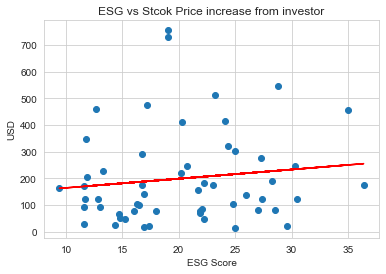

In [20]:
# Plot the Graph of Liner Regression
plt.scatter(M, N)
plt.plot(M, N_pred, color='red')
plt.title('ESG vs Stcok Price increase from investor')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.show()

# Split the Data into Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
M_train, M_test, N_train, N_test = train_test_split(M, N, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(M_train, N_train)

LinearRegression()

In [23]:
print(regressor.intercept_)

[81.4504923]


In [24]:
print(regressor.coef_)

[[6.30035914]]


In [25]:
Test_c=regressor.coef_

In [26]:
# Calculated the balanced accuracy score

test_N_pred = regressor.predict(M_test)


In [27]:

#To compare the actual output values for X_test with the predicted values
NN_pred=pd.DataFrame(list(test_N_pred))
NN_test=pd.DataFrame(list(N_test))
test= pd.concat([NN_pred, NN_test], axis=1, ignore_index=True)


In [28]:
# adding column name to the respective columns
test.columns=( 'Actual', 'Predicted')
test

,Actual,Predicted
0,251.560189,81.775692
1,155.794730,349.479596
2,310.783565,177.386602
3,267.941123,22.297019
4,154.534658,91.217929
5,233.289148,413.832969
6,219.428358,77.131944
7,211.867927,246.158597
8,161.465053,460.364029
9,174.695808,52.343436


In [29]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(N_test, test_N_pred))
print('Mean Squared Error:', metrics.mean_squared_error(N_test, test_N_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(N_test, test_N_pred)))

Mean Absolute Error: 136.5702746235909
Mean Squared Error: 24574.041326858718
Root Mean Squared Error: 156.76109634363596


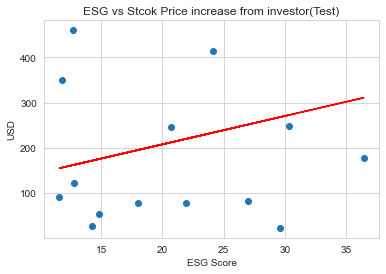

In [30]:
plt.scatter(M_test, N_test)
plt.plot(M_test, test_N_pred, color='red')

plt.title('ESG vs Stcok Price increase from investor(Test)')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.show()

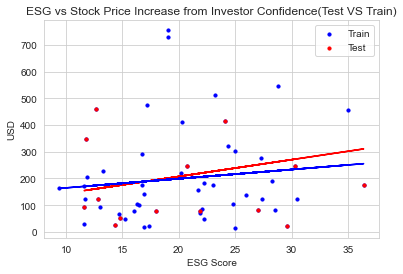

<Figure size 57600x28800 with 0 Axes>

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(M, N, c='b',s=10, marker="o", label='Train')
ax1.scatter(M_test, N_test,s=10, c='r', marker="o", label='Test')
plt.plot(M_test, test_N_pred, color='red')
plt.plot(M, N_pred, color='blue')
plt.legend(loc='upper right')
plt.title('ESG vs Stock Price Increase from Investor Confidence(Test VS Train)')
plt.xlabel('ESG Score')
plt.ylabel('USD')
plt.figure(figsize=(800, 400))
# Saving the figure.

plt.show()
fig.savefig('figure', dpi = 150)

In [32]:
data=M
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 55


# Benefits and Limitation


## Benefit
- All the companies can use this method because sales are always positive. Like the dividend method, if the current year dividend is Zero, we cannot use it.
- No human intervention is needed (automation)
- It shows a positive relationship between the value of Stock Price increase from investor confidence and ESG Score.

## Limitation
- This method is comparable to companies(industry). We need to make sure all the companies in the same industry must have a similar size. ex: Sobey and Walmart are supermarkets, but one is national, and another is global
- The K-value is 0.30, which is higher than 0.05. We cannot use this model to measure how many prices of ESG influences the stock price, but it shows us ESG has a negative relationship with the stock price.
- Our model only uses 2022 information, which can show you a short-term relationship. If we can add past year information, it will establish an exact relationship.

## Improvement
- More Data, Increasing Scope and Time. In this model, we use 89 companies, that are not enough, and we only get the 2022 ESG score because the old information is not for the public. 

## Train and Test
We have 55 stock info, we choose 11 as the Test set and other is Train set.


In [33]:
ps_df.rename(columns = {'Predicted Price':'predictedPrice', 'Mv Price': 'mvPrice','TICKER': 'Ticker'}, inplace = True)
ps_df.insert(0, 'Ticker', ps_df.pop('Ticker'))
ps_df

,Ticker,predictedPrice,mvPrice,Difference,ESG
0,INTC,27.483609,47.0800,19.596391,16.9
1,NVDA,3.126826,231.2400,228.113174,13.3
2,AMAT,14.486176,119.9595,105.473324,16.3
3,QCOM,15.713789,137.0800,121.366211,12.8
4,MSFT,6.270655,297.4400,291.169345,16.7
5,MA,4.110404,353.5900,349.479596,11.8
6,ACN,18.922758,339.5200,320.597242,24.4
7,IBM,49.118324,127.9000,78.781676,16.0
8,INTU,5.716261,482.0000,476.283739,17.2
9,EBAY,25.600281,55.0300,29.429719,11.6


In [35]:
# Save the result in Resources folder
file_to_save = os.path.join("Resources", "ML_model_for_tableau.csv")
ps_df.to_csv(file_to_save, index = False)

In [36]:
from sqlalchemy import Table, Column, String, Float

esgcorrelation = Table(
   'esgcorrelation', metadata, 
    Column('ticker', String, primary_key = True), 
    Column('predictedPrice', Float, nullable=False),
    Column('mvPrice', Float, nullable=False),
    Column('difference', Float, nullable=False),
    Column('esg', Float, nullable=False)
)

metadata.create_all(engine)

# Write DataFrame to active_user table in RDS
ps_df.to_sql('esgcorrelation', con=conn, if_exists='replace', index=False)

55

In [37]:
# Get the name of the table. 
inspector = inspect(engine)
inspector.get_table_names()

['stocks',
 'controversy_type',
 'business_controversy',
 'esgcorrelation',
 'predictions',
 'esg_full',
 'stock_details']

In [38]:
# Execute a connection string
data = engine.execute("SELECT * FROM esgcorrelation LIMIT 1")
for record in data:
    print(record)

('INTC', 27.483608865936027, 47.08, 19.59639113406397, 16.9)


In [41]:
import statsmodels.api as sm

In [43]:
M2 = sm.add_constant(M)
est = sm.OLS(N, M2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8895
Date:                Sun, 10 Apr 2022   Prob (F-statistic):              0.350
Time:                        22:24:08   Log-Likelihood:                -361.00
No. Observations:                  55   AIC:                             726.0
Df Residuals:                      53   BIC:                             730.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.5012     77.478      1.684      0.0

In [46]:
#Calculate the mean squared error
from sklearn.metrics import mean_squared_error

errors = mean_squared_error(M, N)
# report error
print(errors)

62012.182012064295


In [49]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(M, N)
# report error
print(errors)

180.4856887225997


A perfect mean absolute/squared error value is 0.0, which means that all predictions matched the expected values exactly.
Thus, this model current accuracy score is very low.
